In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cites = pd.read_stata('../data/Patent_level_data/USPatent_1926-2010/cites/cites.dta')

In [3]:
cites

,citing,cited
0,2364973,1929241
1,2364973,1917995
2,2364973,2157122
3,2364973,2173741
4,2364973,1985654
...,...,...
52519903,8087092,4658093
52519904,8087092,5440635
52519905,8087093,6201227
52519906,8087093,6075585


In [4]:
cites = cites.sort_values(['citing', 'cited'])

In [5]:
cites

,citing,cited
1,2364973,1917995
0,2364973,1929241
4,2364973,1985654
2,2364973,2157122
3,2364973,2173741
...,...,...
52519872,8087092,7653899
52519883,8087092,7739402
52519906,8087093,6075585
52519905,8087093,6201227


In [6]:
patents_firm_merge = pd.read_stata("../Data/Firm_patent/patents_firm_merge.dta")

In [7]:
patents_firm_merge = patents_firm_merge.sort_values('patnum')

In [8]:
patents_firm_merge

,index,patnum,fdate,idate,pdate,permno,patent_class,subclass,ncites,xi,year,Npats,Tcw,Tsm,tcw,tsm,_merge
400820,84,1568124,06/12/1920,01/05/1926,,12503.0,56.0,006000O,0.0,0.161681,1926,15,25.664662,4.485454,NaN,NaN,matched (3)
400807,94,1568134,09/09/1922,01/05/1926,,12503.0,239.0,584000O,0.0,0.161681,1926,15,25.664662,4.485454,NaN,NaN,matched (3)
61250,102,1568142,08/13/1920,01/05/1926,,10401.0,333.0,168000O,1.0,1.625674,1926,430,871.180249,187.894016,NaN,NaN,matched (3)
400814,123,1568163,05/03/1920,01/05/1926,,12503.0,56.0,011500O,1.0,0.161681,1926,15,25.664662,4.485454,NaN,NaN,matched (3)
527978,298,1568338,11/02/1923,01/05/1926,,14875.0,400.0,689000O,3.0,0.163435,1926,104,134.871391,5.036761,NaN,NaN,matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647954,6240100,7827611,04/12/2002,11/02/2010,02/05/2004,77976.0,726.0,024000O,0.0,105.214000,2010,56,141.172849,2406.822850,0.033356,0.568673,matched (3)
400114,6240102,7827613,10/31/2007,11/02/2010,03/06/2008,12490.0,726.0,026000O,0.0,3.318238,2010,5052,9143.233767,20864.188617,0.080591,0.183903,matched (3)
395896,6240103,7827614,05/22/2008,11/02/2010,01/01/2009,12490.0,726.0,026000O,0.0,3.318238,2010,5052,9143.233767,20864.188617,0.080591,0.183903,matched (3)
1212920,6240104,7827615,01/23/2007,11/02/2010,,39087.0,726.0,028000O,0.0,17.344980,2010,246,586.691397,5574.564518,0.011358,0.107921,matched (3)


In [9]:
def add_permno(cites, patents, how="inner"):
    tmp1 = pd.merge(cites, patents[['patnum', 'permno']], how=how, left_on='citing', right_on='patnum')
    tmp1.drop(columns=['patnum'], inplace=True)
    tmp1.rename(columns={'permno' : 'citing_permno'}, inplace=True)
    tmp2 = pd.merge(tmp1, patents[['patnum', 'permno']], how=how, left_on='cited', right_on='patnum')
    tmp2.drop(columns=['patnum'], inplace=True)
    tmp2.rename(columns={'permno' : 'cited_permno'}, inplace=True)
    return tmp2

In [10]:
cites_permno = add_permno(cites, patents_firm_merge)

In [11]:
cites_permno

,citing,cited,citing_permno,cited_permno
0,2415090,2274164,15480.0,15480.0
1,2417395,2274164,15480.0,15480.0
2,2538680,2274164,15480.0,15480.0
3,2615677,2274164,15480.0,15480.0
4,2415092,2066194,14525.0,14525.0
...,...,...,...,...
8417299,7827605,7424735,75607.0,75607.0
8417300,7827605,7461402,75607.0,75607.0
8417301,7827608,7356545,12490.0,10104.0
8417302,7827611,7540031,77976.0,77976.0


In [12]:
def pat_to_permno_cite(cites):
    return cites.groupby(['citing_permno', 'cited_permno']).count().drop(columns=['cited']).rename(columns={'citing': 'ncited'}).reset_index()

In [13]:
firm_df = pat_to_permno_cite(cites_permno)

In [14]:
firm_df

,citing_permno,cited_permno,ncited
0,10006.0,10006.0,518
1,10006.0,10030.0,1
2,10006.0,10102.0,4
3,10006.0,10145.0,4
4,10006.0,10161.0,1
...,...,...,...
342328,93252.0,10751.0,1
342329,93252.0,12060.0,4
342330,93252.0,22533.0,6
342331,93252.0,26454.0,1


In [15]:
n_citing = cites_permno.groupby(['citing_permno']).count().drop(columns=['cited', 'cited_permno']).rename(columns={'citing': 'ncites'}).reset_index()

In [16]:
n_citing

,citing_permno,ncites
0,10006.0,1598
1,10008.0,3
2,10010.0,2
3,10012.0,102
4,10016.0,19
...,...,...
6503,92940.0,2
6504,93013.0,1
6505,93201.0,19
6506,93236.0,57


In [21]:
tmp = cites_permno.groupby(['citing_permno', 'cited_permno']).count().drop(columns=['cited']).rename(columns={'citing': 'count'}).reset_index()

In [43]:
permno_cite = cites_permno.groupby(['citing_permno']).count().drop(columns=['cited', 'cited_permno']).rename(columns={'citing': 'count', 'citing_permno': 'permno'})
permno_cite.loc[10006.0]

count    1598
Name: 10006.0, dtype: int64

In [44]:
freqs = tmp.apply(lambda row: row['count']/permno_cite.loc[row['citing_permno']], axis=1)

In [75]:
def pat_to_permno_cites(cites, methods=['count', 'freq']):
    """
    Group the patents by the citing and cited companies.
    
    Parameters
    ----------
    cites : DataFrame
        The DataFrame containing the citations and the companies cited/citing.
    methods : list[str], default ['count', 'freq']
        The methods to use for the new columns.
        
        Values must be in `['count', 'freq']`.
        
        'count' adds the number of patents between the cited and citing companies.
         
        'freq' divides count by the total number of patents of the citing company.
    
    Returns
    -------
    DataFrame
        New firm DataFrame with the columns `citing_permno`, `cited_permno`, `count` and/or `freq`.        
    """
    tmp = cites.groupby(['citing_permno', 'cited_permno']).count().drop(columns=['cited']).rename(columns={'citing': 'count'}).reset_index()
    
    if 'freq' in methods:
        grp = tmp.groupby('citing_permno')
        tmp['freq'] = grp['count'].transform(lambda x : x/sum(x))
    
    if 'count' not in methods:
        tmp = tmp.drop(columns=['count'])
        
    return tmp

In [76]:
b = pat_to_permno_cites(cites_permno)
b

,citing_permno,cited_permno,count,freq
0,10006.0,10006.0,518,0.324155
1,10006.0,10030.0,1,0.000626
2,10006.0,10102.0,4,0.002503
3,10006.0,10145.0,4,0.002503
4,10006.0,10161.0,1,0.000626
...,...,...,...,...
342328,93252.0,10751.0,1,0.071429
342329,93252.0,12060.0,4,0.285714
342330,93252.0,22533.0,6,0.428571
342331,93252.0,26454.0,1,0.071429


In [17]:
def cite_hist(permno):
    fig, ax = plt.subplots()
    firm_df[firm_df['citing_permno'] == permno].sort_values('cited_permno').plot(x='cited_permno', y='ncited', label='Nombre de brevets', ax=ax)
    plt.axvline(x=int(permno), color='red', linestyle='dotted', linewidth=0.7, label=f'Entreprise {permno}')
    ax.set_title(f'Histogramme des entreprises citées par {permno}')
    ax.set_xlabel(f'Index des entreprises citées par l\'entreprise {permno}')
    ax.set_ylabel('Nombre de brevets cités')
    plt.legend()
    plt.show()

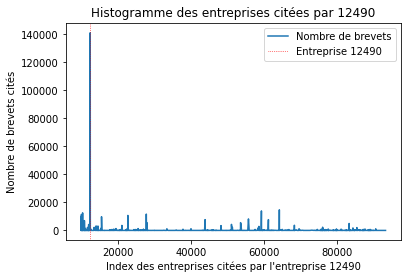

In [18]:
cite_hist(12490)

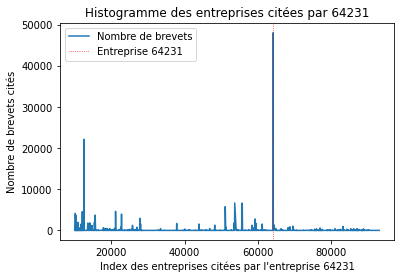

In [19]:
cite_hist(64231)

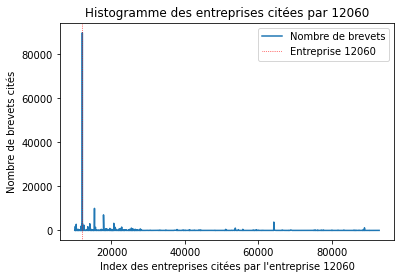

In [20]:
cite_hist(12060)

In [52]:
def cite_hist(permno, permno_cites, method='freq', show=True, save=True, path=None):
    """
    Plot and/or save a histogramm for the given firm id.
    
    Parameters
    ----------
    permno : int
        The index of the firm to plot.
    permno_cites : DataFrame
        The firm DataFrame with `count` and/or `freq`.
    method : str, default 'freq'
        The type of the plot ('freq' or 'count').
    show : bool, default True
        Weither to show the figure.
    save : bool, default True
        Weither to save the figure.
    path : str, default None
        Where to save, if `None`, saves in f"../images/cites/hist_{permno}".
    
    Returns
    -------
    None
    """
    assert method in permno_cites.columns, "The wanted method is not possible with the given DataFrame."
    
    if save and path is None:
        path = f"../images/cites/hist_{permno}"
        
    fig, ax = plt.subplots()
    label = 'Nombre de brevets' if method=='count' else 'Frequence'
    permno_cites[permno_cites['citing_permno'] == permno].sort_values('cited_permno').plot(x='cited_permno', y=method, label=label, ax=ax)
    plt.axvline(x=int(permno), color='red', linestyle='dotted', linewidth=0.7, label=f'Entreprise {permno}')
    ax.set_title(f'Histogramme des entreprises citées par {permno}')
    ax.set_xlabel(f'Index des entreprises citées par l\'entreprise {permno}')
    ax.set_ylabel(label)
    plt.legend()
    
    if save:
        fig.savefig(path)
    if show:
        plt.show()

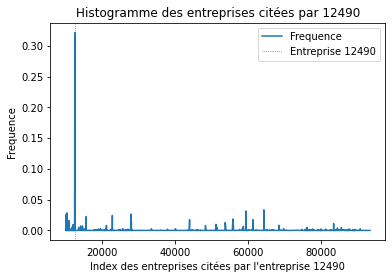

In [53]:
cite_hist(12490, b)

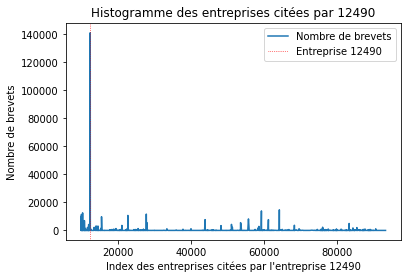

In [54]:
cite_hist(12490, b, method='count')